# Метод Ньютона-Рафсона

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def f(x1, x2):
    return 1 - 2*x1 - 2*x2 - 4*x1*x2 + 10*x1**2 + 2*x2**2

# Численное вычисление градиента
def gradient(func, x1, x2):
    delta = 1e-6
    grad_x1 = (func(x1 + delta, x2) - func(x1 - delta, x2)) / (2 * delta)
    grad_x2 = (func(x1, x2 + delta) - func(x1, x2 - delta)) / (2 * delta)
    return np.array([grad_x1, grad_x2])

def hessian(f, x1, x2, h=1e-4):
    delta = 1e-6
    hessian = np.zeros((2, 2))
    hessian[0, 0] = (f(x1 + delta, x2) - 2 * f(x1, x2) + f(x1 - delta, x2)) / (delta * delta)
    hessian[1, 1] = (f(x1, x2 + delta) - 2 * f(x1, x2) + f(x1, x2 - delta)) / (delta * delta)
    hessian[0, 1] = hessian[1, 0] = (f(x1 + delta, x2 + delta) - f(x1 + delta, x2 - delta)
                            - f(x1 - delta, x2 + delta) + f(x1 - delta, x2 - delta)) / (4 * delta * delta)
    return hessian

def inv_matrix(matrix):
    mt = np.array(matrix)
    return np.linalg.inv(mt)

def det_matrix(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

def q(t, x, d_k):
    return f(x[0] + t * d_k[0], x[1] + t * d_k[1])

def q_gradient(func, x, t, d_k, h=1e-4):
    dq_dt = ((func(t + h, x, d_k) - func(t - h, x, d_k))) / (2 * h)
    return dq_dt

def q_gradient_descent(x0, h, q, t, d_k, threshold, learning_rate):
    q_start = q(t, x0, d_k)
    t_new = t - learning_rate * q_gradient(q, x0, t, d_k)
    new_q = q(t_new, x0, d_k)
    
    while abs(q_start - new_q) > threshold:
        q_start = new_q
        t_new = t_new - learning_rate * q_gradient(q, x0, t_new, d_k)
        new_q = q(t_new, x0, d_k)
    
    return t_new

trajectory = []


def calc(f, q, eps1=1e-6, eps2=1e-6, t=1,  M=100, x_0=[3, 10]):
    
    k = 0
    
    while True:
        print(k, x_0, f(*x_0))
        grad = gradient(f, x_0[0], x_0[1])

        if k >= M:
            return x_0

        new_hessian = hessian(f, x_0[0], x_0[1])

        inv_hessian = inv_matrix(new_hessian)

        if det_matrix(inv_hessian) > 0:
            d_k = -np.dot(inv_hessian, np.array(grad))
        else:
            d_k = -np.array(grad)
            
        new_t = q_gradient_descent(x_0, 1e-6, q, t, d_k, 1e-6, 0.001)
        new_x = [x_0 + new_t * dk for x_0, dk in zip(x_0, d_k)]

        if euclid_norm(np.array(new_x) - np.array(x_0)) <= eps2 and \
            abs(f(new_x[0], new_x[1]) - f(x_0[0], x_0[1])) <= eps2:
            return new_x
            
        trajectory.append(new_x)
        
        k += 1
        x_0 = new_x
        t = new_t

In [44]:
new_x = calc(f, q)

0 [3, 10] 145
1 [0.2492709657757457, 0.751381004341976] 1.3156452703055876e-05
2 [0.2500016429176234, 0.7499967038574628] 7.038192251229702e-11
3 [0.24999999625810715, 0.7500000074744986] 4.440892098500626e-16


# Метод Марквардта

In [27]:
def target_function(x1, x2):
    return 1 - 2*x1 - 2*x2 - 4*x1*x2 + 10*x1**2 + 2*x2**2

In [28]:

class OptimizationConfig:
    grad_threshold = 1e-2  # Погрешность для градиента
    step_threshold = 1e-4  # Погрешность для изменений
    max_steps = 100       # Максимальное количество шагов
    identity_matrix = np.eye(2)  # Идентичная матрица для регуляризации



# Функция для вычисления градиента
def compute_gradient(func, x, y):
    epsilon = 1e-6
    df_dx = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    df_dy = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([df_dx, df_dy])


# Функция для вычисления гессиана
def compute_hessian(func, x, y):
    epsilon = 1e-6
    hessian = np.zeros((2, 2))
    hessian[0, 0] = (func(x + epsilon, y) - 2 * func(x, y) + func(x - epsilon, y)) / (epsilon ** 2)
    hessian[1, 1] = (func(x, y + epsilon) - 2 * func(x, y) + func(x, y - epsilon)) / (epsilon ** 2)
    hessian[0, 1] = hessian[1, 0] = (func(x + epsilon, y + epsilon) - func(x + epsilon, y - epsilon) - 
                                    func(x - epsilon, y + epsilon) + func(x - epsilon, y - epsilon)) / (4 * epsilon ** 2)
    return hessian


# Обратная матрица с проверкой
def invert_matrix(matrix):
    determinant = np.linalg.det(matrix)
    if np.abs(determinant) < 1e-6: 
        matrix += np.eye(2) * 1e-6  # Для предотвращения сингулярности
    return np.linalg.inv(matrix)


In [29]:
# Основная функция для оптимизации
def optimize_function():
    iteration = 0
    current_point = np.array([3, 10])  # Начальная точка
    regularization = 1  # Параметр регуляризации
    trajectory = [current_point]  # Сохраняем точки для графика

    while iteration < OptimizationConfig.max_steps:
        print(f"Шаг {iteration}")

        gradient = compute_gradient(target_function, current_point[0], current_point[1])
        grad_norm = np.linalg.norm(gradient)

        if grad_norm <= OptimizationConfig.grad_threshold:  # Условие для завершения
            print(f"Оптимальная точка: {current_point}, {target_function(*current_point)}")
            break

        # Вычисление направления спуска
        hessian = compute_hessian(target_function, current_point[0], current_point[1])
        direction = -np.dot(invert_matrix(hessian + OptimizationConfig.identity_matrix * regularization), gradient)

        # Обновление точки
        new_point = current_point + direction
        trajectory.append(new_point)
        print(f"Новая точка: {new_point}, ")

        # Регуляризация
        if target_function(new_point[0], new_point[1]) < target_function(current_point[0], current_point[1]):
            regularization /= 2
        else:
            regularization *= 2
            
        current_point = new_point
        iteration += 1

    return trajectory

In [30]:
trajectory = optimize_function()

Шаг 0
Новая точка: [0.82346188 3.06895725], 
Шаг 1
Новая точка: [0.3272574  1.07487922], 
Шаг 2
Новая точка: [0.25579081 0.77448944], 
Шаг 3
Новая точка: [0.25022711 0.75096179], 
Шаг 4
Оптимальная точка: [0.25022711 0.75096179], 1.4921456290561963e-06


In [35]:
# Функция для построения графика
def plot_optimization_trajectory(trajectory):
    X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 10, 100))
    Z = f(X, Y)
    
    trajectory = np.array(trajectory)
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap="coolwarm", alpha=0.7)
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='black', label='Траектория')
    plt.title("График оптимизации")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.colorbar(label='f(x, y)')
    plt.show()

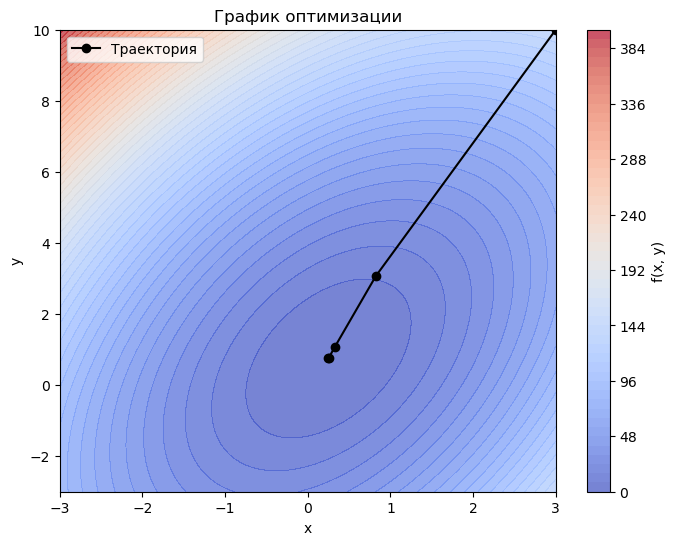

In [36]:
plot_optimization_trajectory(trajectory)

# Контрольные вопросы

### Основное различие в использовании регуляризации

- **Метод Ньютона-Рафсона:** не включает явной регуляризации, что делает его уязвимым к проблемам с численной стабильностью при вырожденных или плохо обусловленных Гессианах.

- **Метод Марквардта:** использует регуляризацию, добавляя малую величину к диагонали матрицы Гессе, что улучшает численную устойчивость и предотвращает проблемы с сингулярностью.

### Итоги:

- **Метод Ньютона-Рафсона:** более быстрый метод с квадратичной сходимостью, но может страдать от проблем с численной стабильностью в случае плохо обусловленных или вырожденных матриц Гессе.

- **Метод Марквардта:** более устойчивый метод, использующий регуляризацию, что делает его менее чувствительным к численным ошибкам и сингулярности, но с меньшей скоростью сходимости.


| **Характеристика**               | **Методы нулевого порядка**               | **Методы первого порядка**                    | **Методы второго порядка**                   |
|-----------------------------------|-------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Что используют**                | Значение целевой функции.                 | Значение целевой функции и её градиент.       | Значение функции, градиент и гессиан.        |
| **Примеры методов**               | Метод случайного поиска, прямой перебор.  | Градиентный спуск, метод сопряженных градиентов. | Метод Ньютона, метод Марквардта.            |
| **Информация о функции**          | Только значения функции.                  | Первая производная функции (градиент).        | Вторая производная (матрица Гессе).          |
| **Точность выбора шага**          | Низкая — шаг зависит от эвристик.         | Средняя — шаг определяется направлением градиента. | Высокая — шаг учитывает кривизну функции.   |
| **Скорость сходимости**           | Медленная.                                | Умеренная (линейная в общем случае).          | Быстрая (обычно квадратичная вблизи экстремума). |
